In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [20]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

In [4]:
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
df = pd.read_csv('gdrive/My Drive/nyccleaned.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
def drop_outliers(df, field_name):
    distance = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > distance + np.percentile(df[field_name], 75)].index, inplace=True)
    df.drop(df[df[field_name] < np.percentile(df[field_name], 25) - distance].index, inplace=True)

In [8]:
drop_outliers(df, 'trip_distance')
drop_outliers(df, 'total_amount')

In [9]:
onehotreq = ['payment_type','TripStart_dayofweek','PickupBorough','DropoffBorough','TripStart_hourofday']
Xcols = ['passenger_count','trip_distance','payment_type','TripStart_dayofweek', 'TripStart_hourofday','PickupBorough','DropoffBorough','Avg Temp']
Ycols = ['total_amount']

In [47]:
df['PickupBorough'].value_counts()

Manhattan        842093
Queens            17004
Brooklyn           8995
Unknown            7723
Bronx              5498
Staten Island        55
EWR                   9
Name: PickupBorough, dtype: int64

In [10]:
df.head()

,Unnamed: 0,TripStart,TripEnd,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,TripStart_dayofmonth,TripStart_month,TripStart_year,TripStart_dayofweek,TripStart_week,TripStart_time,TripStart_hourofday,TripStart_minuteofday,TripEnd_dayofmonth,TripEnd_month,TripEnd_year,TripEnd_dayofweek,TripEnd_week,TripEnd_time,TripEnd_hourofday,TripEnd_minuteofday,TripStart_date,TripEnd_date,PickupBorough,PickupZone,DropoffBorough,DropoffZone,Max Temp,Min Temp,Avg Temp,Departure Temp,HDD,CDD,Precipitation,New Snow,Snow Depth
0,0,2020-04-01 00:41:00,2020-04-01 01:01:00,1,1.20,1,41,24,2,5.5,0.5,0.5,0.00,0.0,0.3,6.80,0.0,1,4,2020,2,14,00:41:00,0,41,1,4,2020,2,14,01:01:00,1,1,2020-04-01 00:00:00,2020-04-01,Manhattan,Central Harlem,Manhattan,Bloomingdale,56,38,47.0,-0.8,18,0,0,0,0
1,1,2020-04-01 16:59:00,2020-04-01 17:09:00,1,1.63,1,41,24,2,9.0,1.0,0.5,0.00,0.0,0.3,10.80,0.0,1,4,2020,2,14,16:59:00,16,59,1,4,2020,2,14,17:09:00,17,9,2020-04-01 00:00:00,2020-04-01,Manhattan,Central Harlem,Manhattan,Bloomingdale,56,38,47.0,-0.8,18,0,0,0,0
2,2,2020-04-01 10:27:00,2020-04-01 10:44:00,1,4.60,1,68,24,2,16.5,0.0,0.5,0.00,0.0,0.3,19.80,2.5,1,4,2020,2,14,10:27:00,10,27,1,4,2020,2,14,10:44:00,10,44,2020-04-01 00:00:00,2020-04-01,Manhattan,East Chelsea,Manhattan,Bloomingdale,56,38,47.0,-0.8,18,0,0,0,0
3,3,2020-04-01 12:43:00,2020-04-01 12:47:00,1,1.30,1,75,24,1,6.0,0.0,0.5,1.36,0.0,0.3,8.16,0.0,1,4,2020,2,14,12:43:00,12,43,1,4,2020,2,14,12:47:00,12,47,2020-04-01 00:00:00,2020-04-01,Manhattan,East Harlem South,Manhattan,Bloomingdale,56,38,47.0,-0.8,18,0,0,0,0
4,4,2020-04-01 13:58:00,2020-04-01 14:10:00,1,1.60,1,75,24,3,9.5,0.0,0.5,0.00,0.0,0.3,10.30,0.0,1,4,2020,2,14,13:58:00,13,58,1,4,2020,2,14,14:10:00,14,10,2020-04-01 00:00:00,2020-04-01,Manhattan,East Harlem South,Manhattan,Bloomingdale,56,38,47.0,-0.8,18,0,0,0,0


In [11]:
cat_pipe = Pipeline([('onehotencode', OneHotEncoder(handle_unknown='ignore'))])


In [12]:
ohnum_pipe = Pipeline([('onehotencodeNum', OneHotEncoder(handle_unknown='ignore'))])

In [13]:
numScaler = Pipeline([('scaler', MinMaxScaler() )])

In [14]:
catcols = ['PickupBorough','DropoffBorough']
ohnums = [ 'payment_type' , 'TripStart_dayofweek' , 'TripStart_hourofday' ]
scalernums =['passenger_count','trip_distance','Avg Temp']

In [15]:
preprocess = ColumnTransformer(transformers=[('cat', cat_pipe,catcols),
                                             ('numoh', ohnum_pipe, ohnums),
                                             ('scaler', numScaler, scalernums)])

In [16]:
pipe = Pipeline(steps=[('preprocessor', preprocess),
                       ('model', LinearRegression())])

In [17]:
X = df[Xcols]
y = df[Ycols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('onehotencode',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse=True))],
                                          

In [19]:
y_train_pred = pipe.predict(X_train)

In [21]:
y_train_pred

array([[16.3700335 ],
       [15.12347901],
       [ 6.03301906],
       ...,
       [13.54921632],
       [11.92794462],
       [25.11555356]])

In [22]:
y_test_pred = pipe.predict(X_test)

In [23]:
rms = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)
print(rms)
print(r2)

2.077289638424729
0.8024222743647549


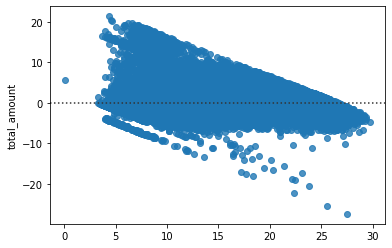

In [24]:
sns.residplot(x=y_test_pred, y=y_test)

In [45]:
data = [{'passenger_count': 1, 'trip_distance':25, 'payment_type':1,'TripStart_dayofweek': 6, 'TripStart_hourofday': 17,'PickupBorough': 'Manhattan', 'DropoffBorough': 'Bronx','Avg Temp': 90}]
pipe.predict(pd.DataFrame(data))

array([[84.75288683]])

In [26]:
import pickle

In [32]:
pickle.dump(pipe, open('taxiregressor.pkl', 'wb'))

In [44]:
from google.colab import files
files.download("taxiregressor.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
ls

gdrive/  sample_data/  taxiregressor.pickle  taxiregressor.pkl


In [36]:
import os